## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import viz_plots as vp

pd.set_option('display.max.columns',100)
pd.set_option('float_format', '{:.2f}'.format)

# EDA

In [4]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Numerical dat

In [168]:
data['target'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  
target_data = data['target']

input_data = data.drop('y', axis=1)
input_data = input_data.drop('target', axis=1)

num_cols = list(data.select_dtypes(include=['int64', 'float64']).columns)
cat_cols = list(data.select_dtypes(include=['object']).columns)
print('Categorical columns:', cat_cols, '\nNumerical columns:', num_cols) 

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']


In [7]:
data1 = data[data['target'] == 1]
data0 = data[data['target'] == 0]

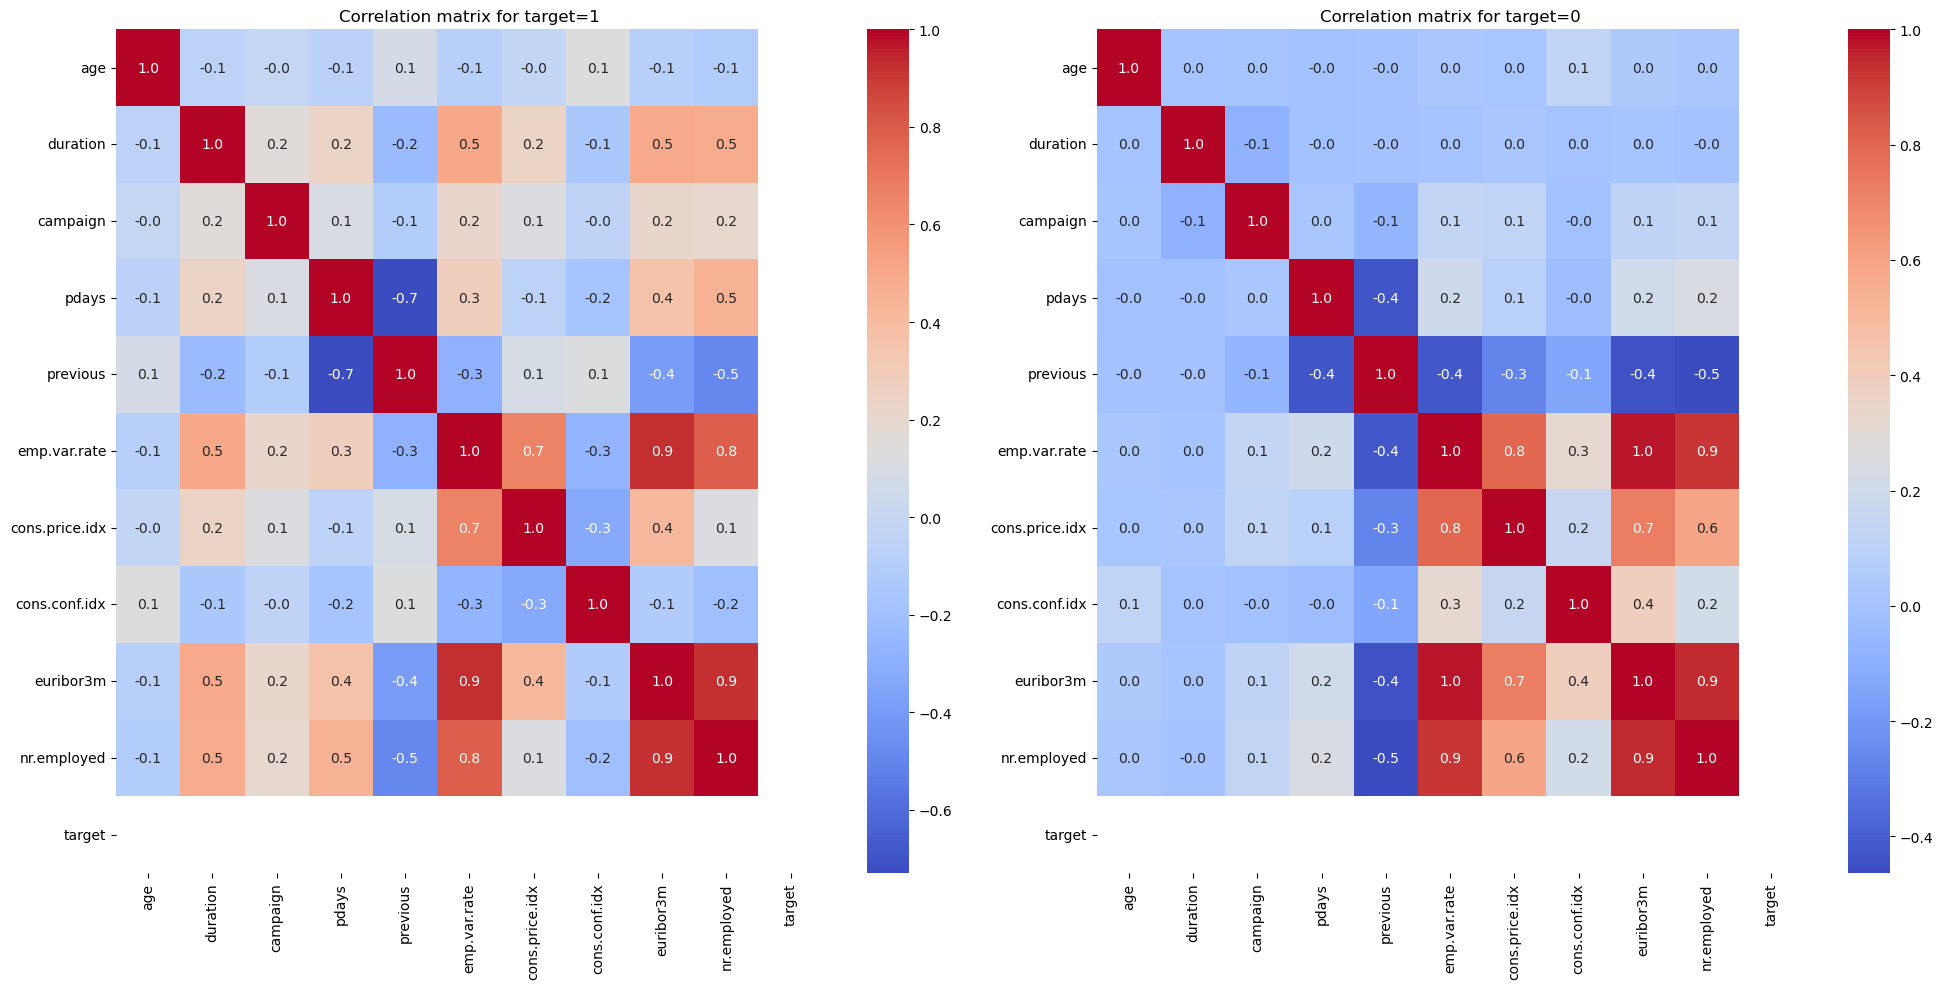

In [8]:
corr1 = data1[num_cols].corr()
corr0 = data0[num_cols].corr()

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix for target=1')

plt.subplot(1, 2, 2)
sns.heatmap(corr0, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix for target=0')

plt.tight_layout()
plt.show()


<Axes: >

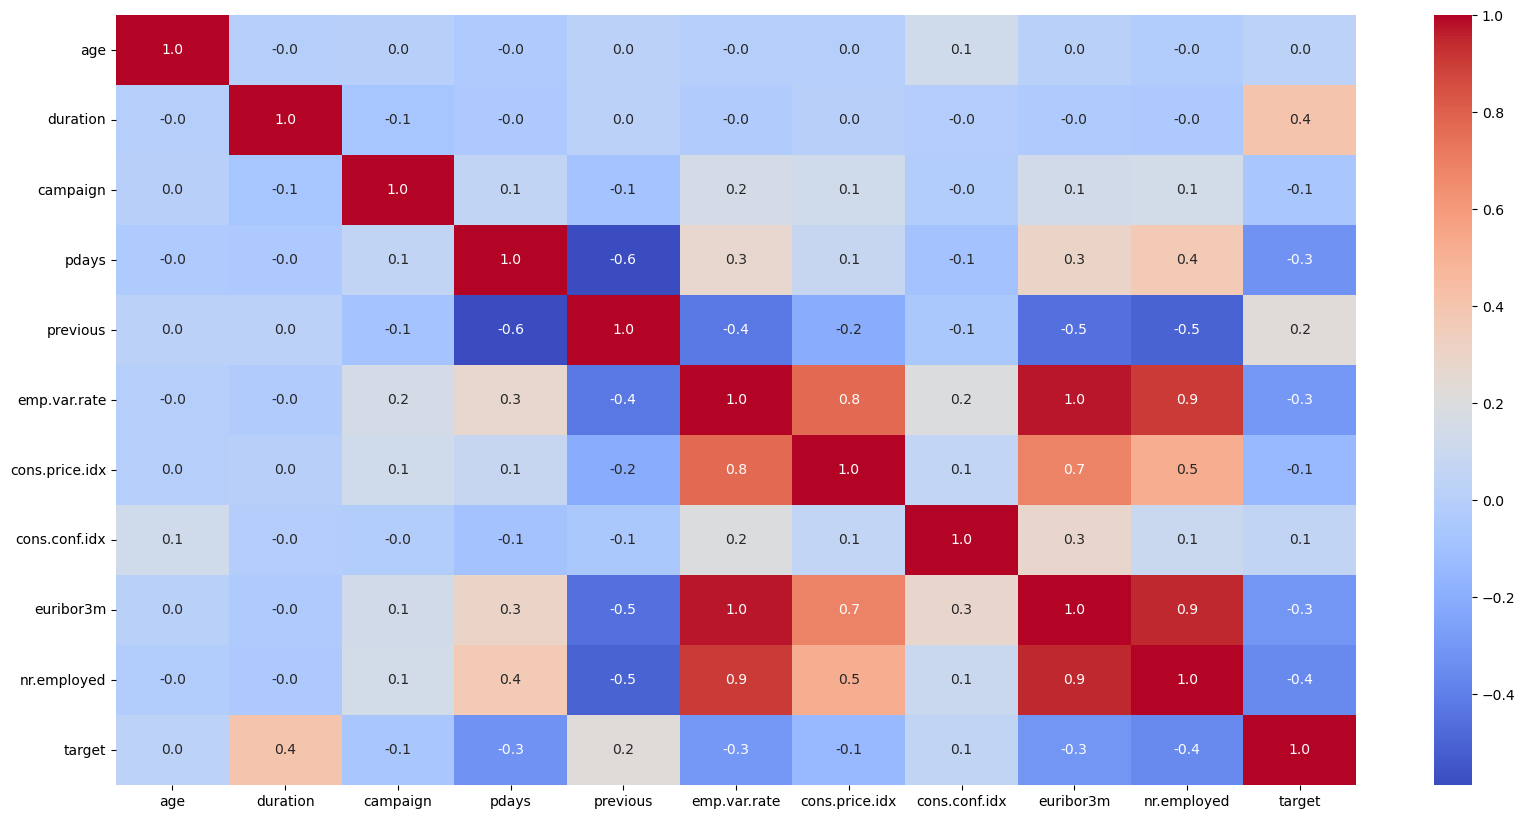

In [9]:
corr = data[num_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')

In [10]:
data_num_stat = pd.DataFrame([data[num_cols].mean(), data[num_cols].min(), data[num_cols].max()], index=['mean',  'min', 'max'])

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


In [11]:
outliers = {}
for col in num_cols:
    outlier = vp.outlier_range(data, col)
    outliers[col] = outlier
    
outliers_df = pd.DataFrame([outliers], index=['outlier'])    

Максимальне значення, після якого існують викиди для age: 69.5
Максимальне значення, після якого існують викиди для duration: 644.5
Максимальне значення, після якого існують викиди для campaign: 6.0
Максимальне значення, після якого існують викиди для pdays: 999.0
Максимальне значення, після якого існують викиди для previous: 0.0
Максимальне значення, після якого існують викиди для emp.var.rate: 6.200000000000001
Максимальне значення, після якого існують викиди для cons.price.idx: 95.3725
Максимальне значення, після якого існують викиди для cons.conf.idx: -26.949999999999992
Максимальне значення, після якого існують викиди для euribor3m: 10.3865
Максимальне значення, після якого існують викиди для nr.employed: 5421.6
Максимальне значення, після якого існують викиди для target: 0.0


In [12]:
data_num_stat = pd.concat([data_num_stat, outliers_df], axis=0)
data_num_stat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00
outlier,69.50,644.50,6.00,999.00,0.00,6.20,95.37,-26.95,10.39,5421.60,0.00


In [13]:
data['campaign'].describe( percentiles =[0.75, 0.9, 0.99, 0.999, 0.9999])

count    41188.00
mean         2.57
std          2.77
min          1.00
50%          2.00
75%          3.00
90%          5.00
99%         14.00
99.9%       29.00
99.99%      41.88
max         56.00
Name: campaign, dtype: float64

In [14]:
percentile_0999 = data['campaign'].quantile(0.9999)
cont = data[data['campaign'] > percentile_0999]
print( 'Number of records with duration less than 99.99 percentile:', cont.shape[0], 'percent:', percentile_0999)

Number of records with duration less than 99.99 percentile: 5 percent: 41.881299999993644


<Figure size 2000x1000 with 0 Axes>

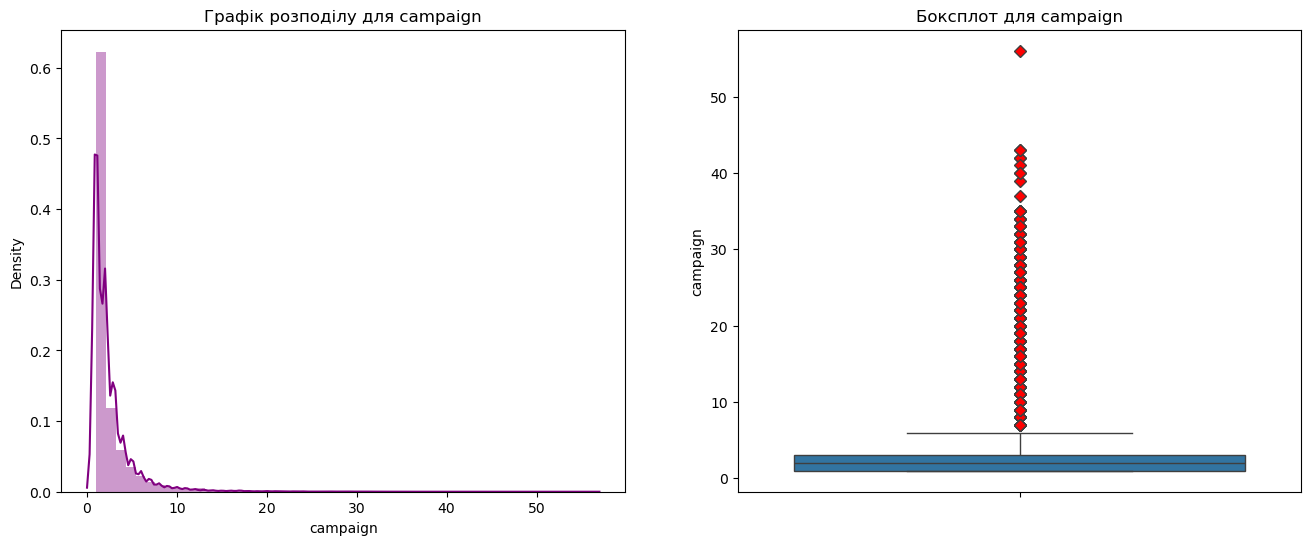

In [15]:
plt.figure(figsize=(20, 10))
vp.dist_box(data,'campaign')

In [16]:
data['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [17]:
# data.pdays.value_counts(ascending=True)

In [18]:
data['cons.conf.idx'].describe( percentiles =[0.75, 0.9, 0.99, 0.999, 0.9999])

count    41188.00
mean       -40.50
std          4.63
min        -50.80
50%        -41.80
75%        -36.40
90%        -36.10
99%        -26.90
99.9%      -26.90
99.99%     -26.90
max        -26.90
Name: cons.conf.idx, dtype: float64

In [19]:
data[data['cons.conf.idx'] == -26.90].shape[0]

447

In [20]:
percentile_0999 = data['cons.conf.idx'].quantile(0.999)
cont = data[data['cons.conf.idx'] > percentile_0999]
print( 'Number of records with duration less than 99.99 percentile:', cont.shape[0], 'percent:', percentile_0999)
print(f'Target distribution: {data[data['cons.conf.idx'] > percentile_0999].target.value_counts()}') 

Number of records with duration less than 99.99 percentile: 0 percent: -26.9
Target distribution: Series([], Name: count, dtype: int64)


<Figure size 2000x1000 with 0 Axes>

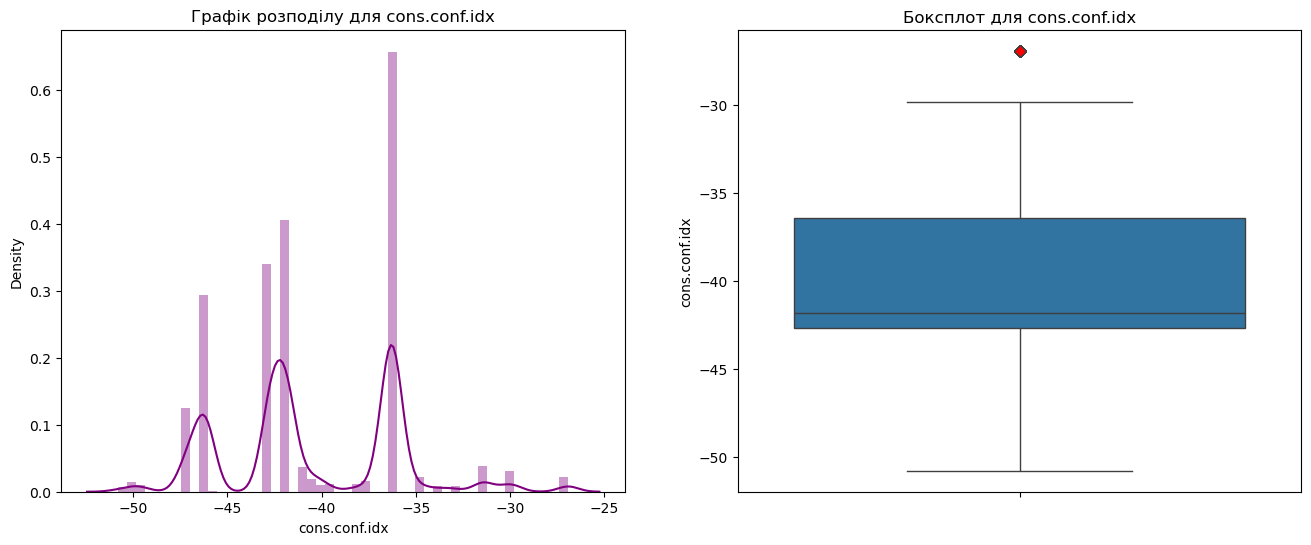

In [21]:
plt.figure(figsize=(20, 10))
vp.dist_box(data,'cons.conf.idx')

In [22]:
data.duration.describe( percentiles =[0.75, 0.9, 0.99, 0.999, 0.9999])

count    41188.00
mean       258.29
std        259.28
min          0.00
50%        180.00
75%        319.00
90%        551.00
99%       1271.13
99.9%     2175.59
99.99%    3616.52
max       4918.00
Name: duration, dtype: float64

In [23]:
percentile_0999 = data.duration.quantile(0.999)
cont = data[data['duration'] > percentile_0999]
print( 'Number of records with duration less than 99.99 percentile:', cont.shape[0], percentile_0999)

Number of records with duration less than 99.99 percentile: 42 2175.5850000000864


<Figure size 2000x1000 with 0 Axes>

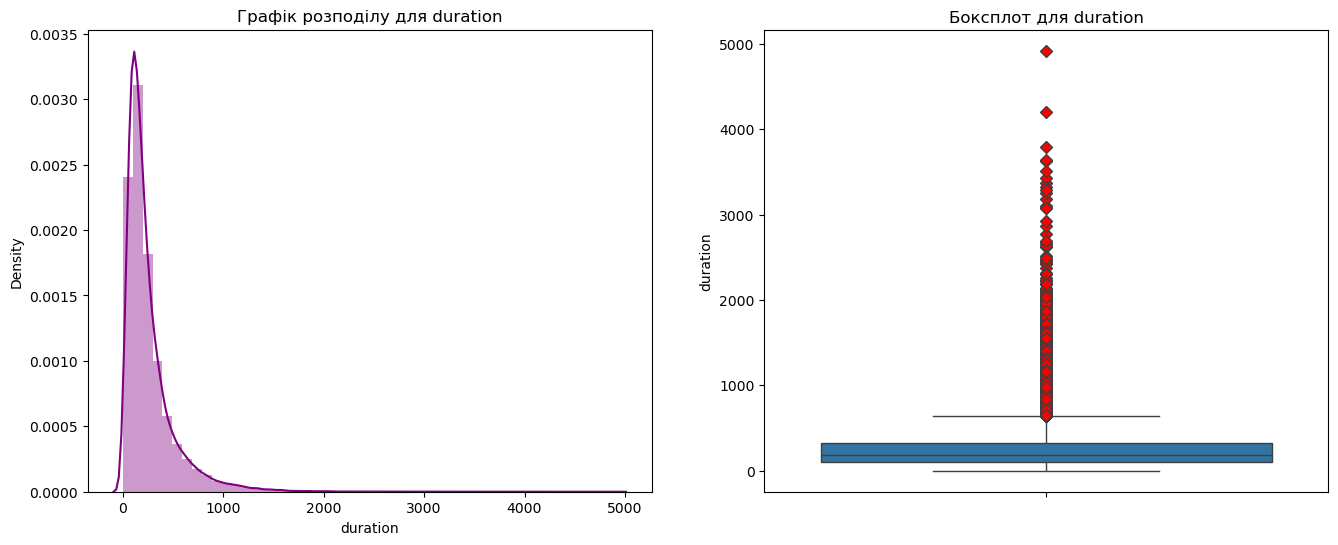

In [24]:
plt.figure(figsize=(20, 10))
vp.dist_box(data,'duration')

Максимальне значення, після якого існують викиди для duration: 555.0
Максимальне значення, після якого існують викиди для duration: 1473.625


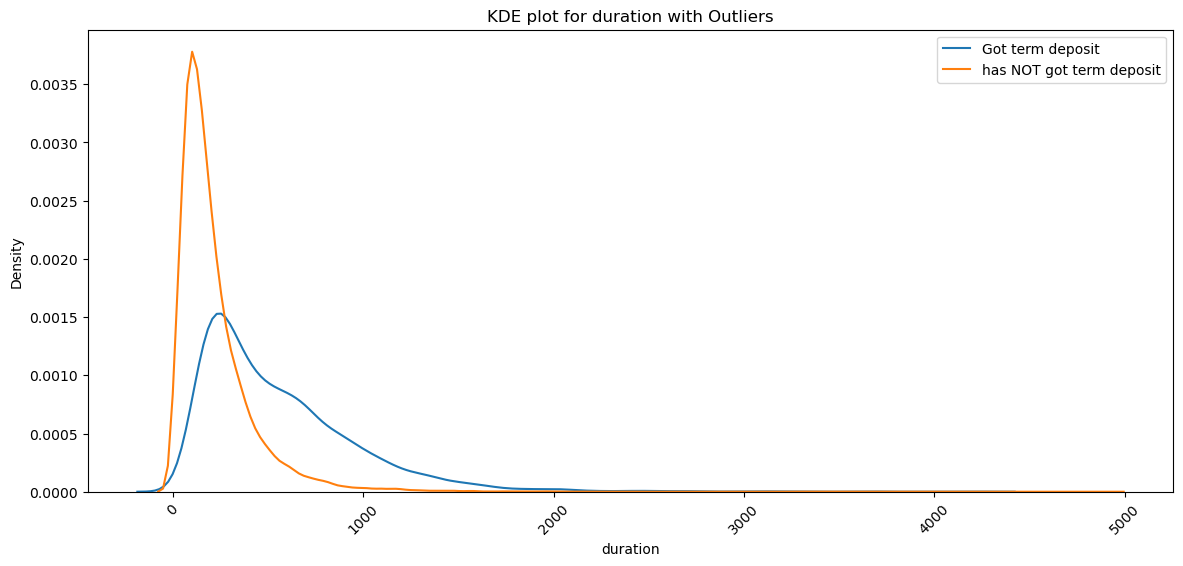

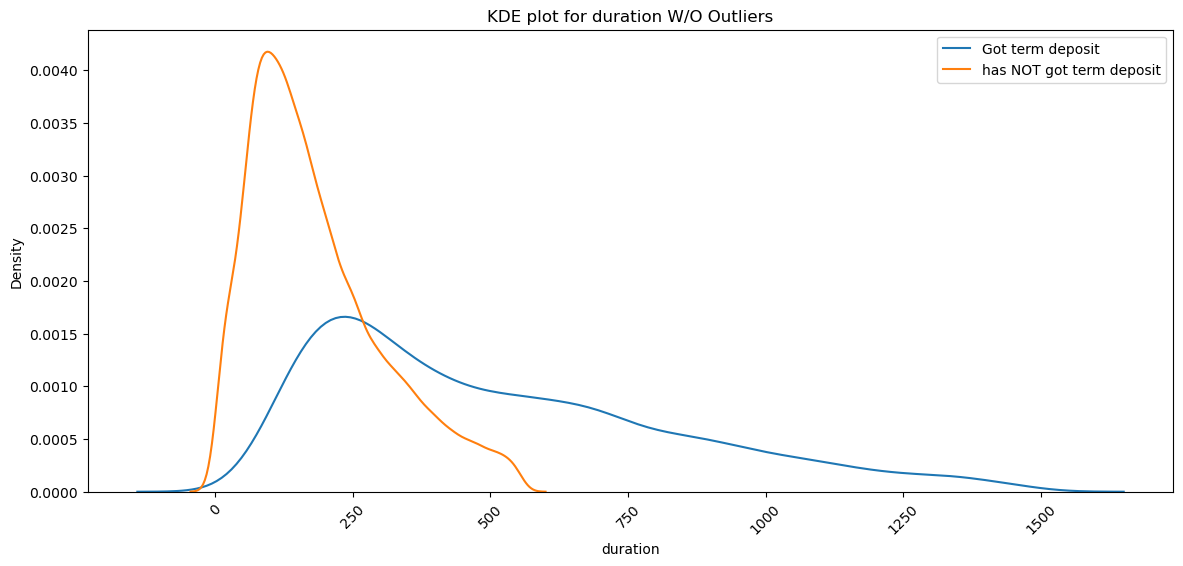

In [25]:
max_duration_v0, max_duration_v1 = vp.outlier_analisys(data0, data1, 'duration')

In [26]:
data['target'].value_counts(), data[data['duration'] == 0].target.value_counts()

(target
 0    36548
 1     4640
 Name: count, dtype: int64,
 target
 0    4
 Name: count, dtype: int64)

In [27]:
data.groupby('y')[data.select_dtypes(exclude='object').columns].agg(['mean','min','max'])

age         duration           campaign          pdays           \
     mean min max     mean min   max     mean min max   mean min  max   
y                                                                       
no  39.91  17  95   220.84   0  4918     2.63   1  56 984.11   0  999   
yes 40.91  17  98   553.19  37  4199     2.05   1  23 792.04   0  999   

    previous         emp.var.rate            cons.price.idx              \
        mean min max         mean   min  max           mean   min   max   
y                                                                         
no      0.13   0   7         0.25 -3.40 1.40          93.60 92.20 94.77   
yes     0.49   0   6        -1.23 -3.40 1.40          93.35 92.20 94.77   

    cons.conf.idx               euribor3m           nr.employed          \
             mean    min    max      mean  min  max        mean     min   
y                                                                         
no         -40.59 -50.80 -26.90      3.81 0.63 5.04     5176.17 4963.60   
yes        -39.79 -50.80 -26.90      2.12 0.63 5.04     5095.12 4963.60   

            target          
        max   mean min max  
y                           
no  5228.10   0.00   0   0  
yes 5228.10   1.00   1   1

In [28]:
origin_shape = data.shape[0]

In [29]:
campaign9999 = data['campaign'].quantile(0.9999)
cont = data[data['campaign'] > percentile_0999]


duration9999 = data.duration.quantile(0.999)
cont = data[data['duration'] > percentile_0999]


data_clear = data[(data['campaign'] <= campaign9999) & (data['duration'] <= duration9999)]
clear_shape = data_clear.shape[0]

In [30]:
print(f'Number of records removed: {origin_shape - clear_shape}, data reduces by {((origin_shape - clear_shape) / origin_shape) * 100:.2f}%')

Number of records removed: 47, data reduces by 0.11%


In [31]:
data_clear.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00,41141.00
mean,40.03,255.67,2.56,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03,0.11
std,10.42,245.23,2.73,186.95,0.50,1.57,0.58,4.63,1.73,72.26,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,179.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,2139.00,41.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


In [32]:
# plt.figure(figsize=(20, 10))
# vp.dist_box(data_clear,'campaign')

## Categorical data

In [33]:
data[cat_cols]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


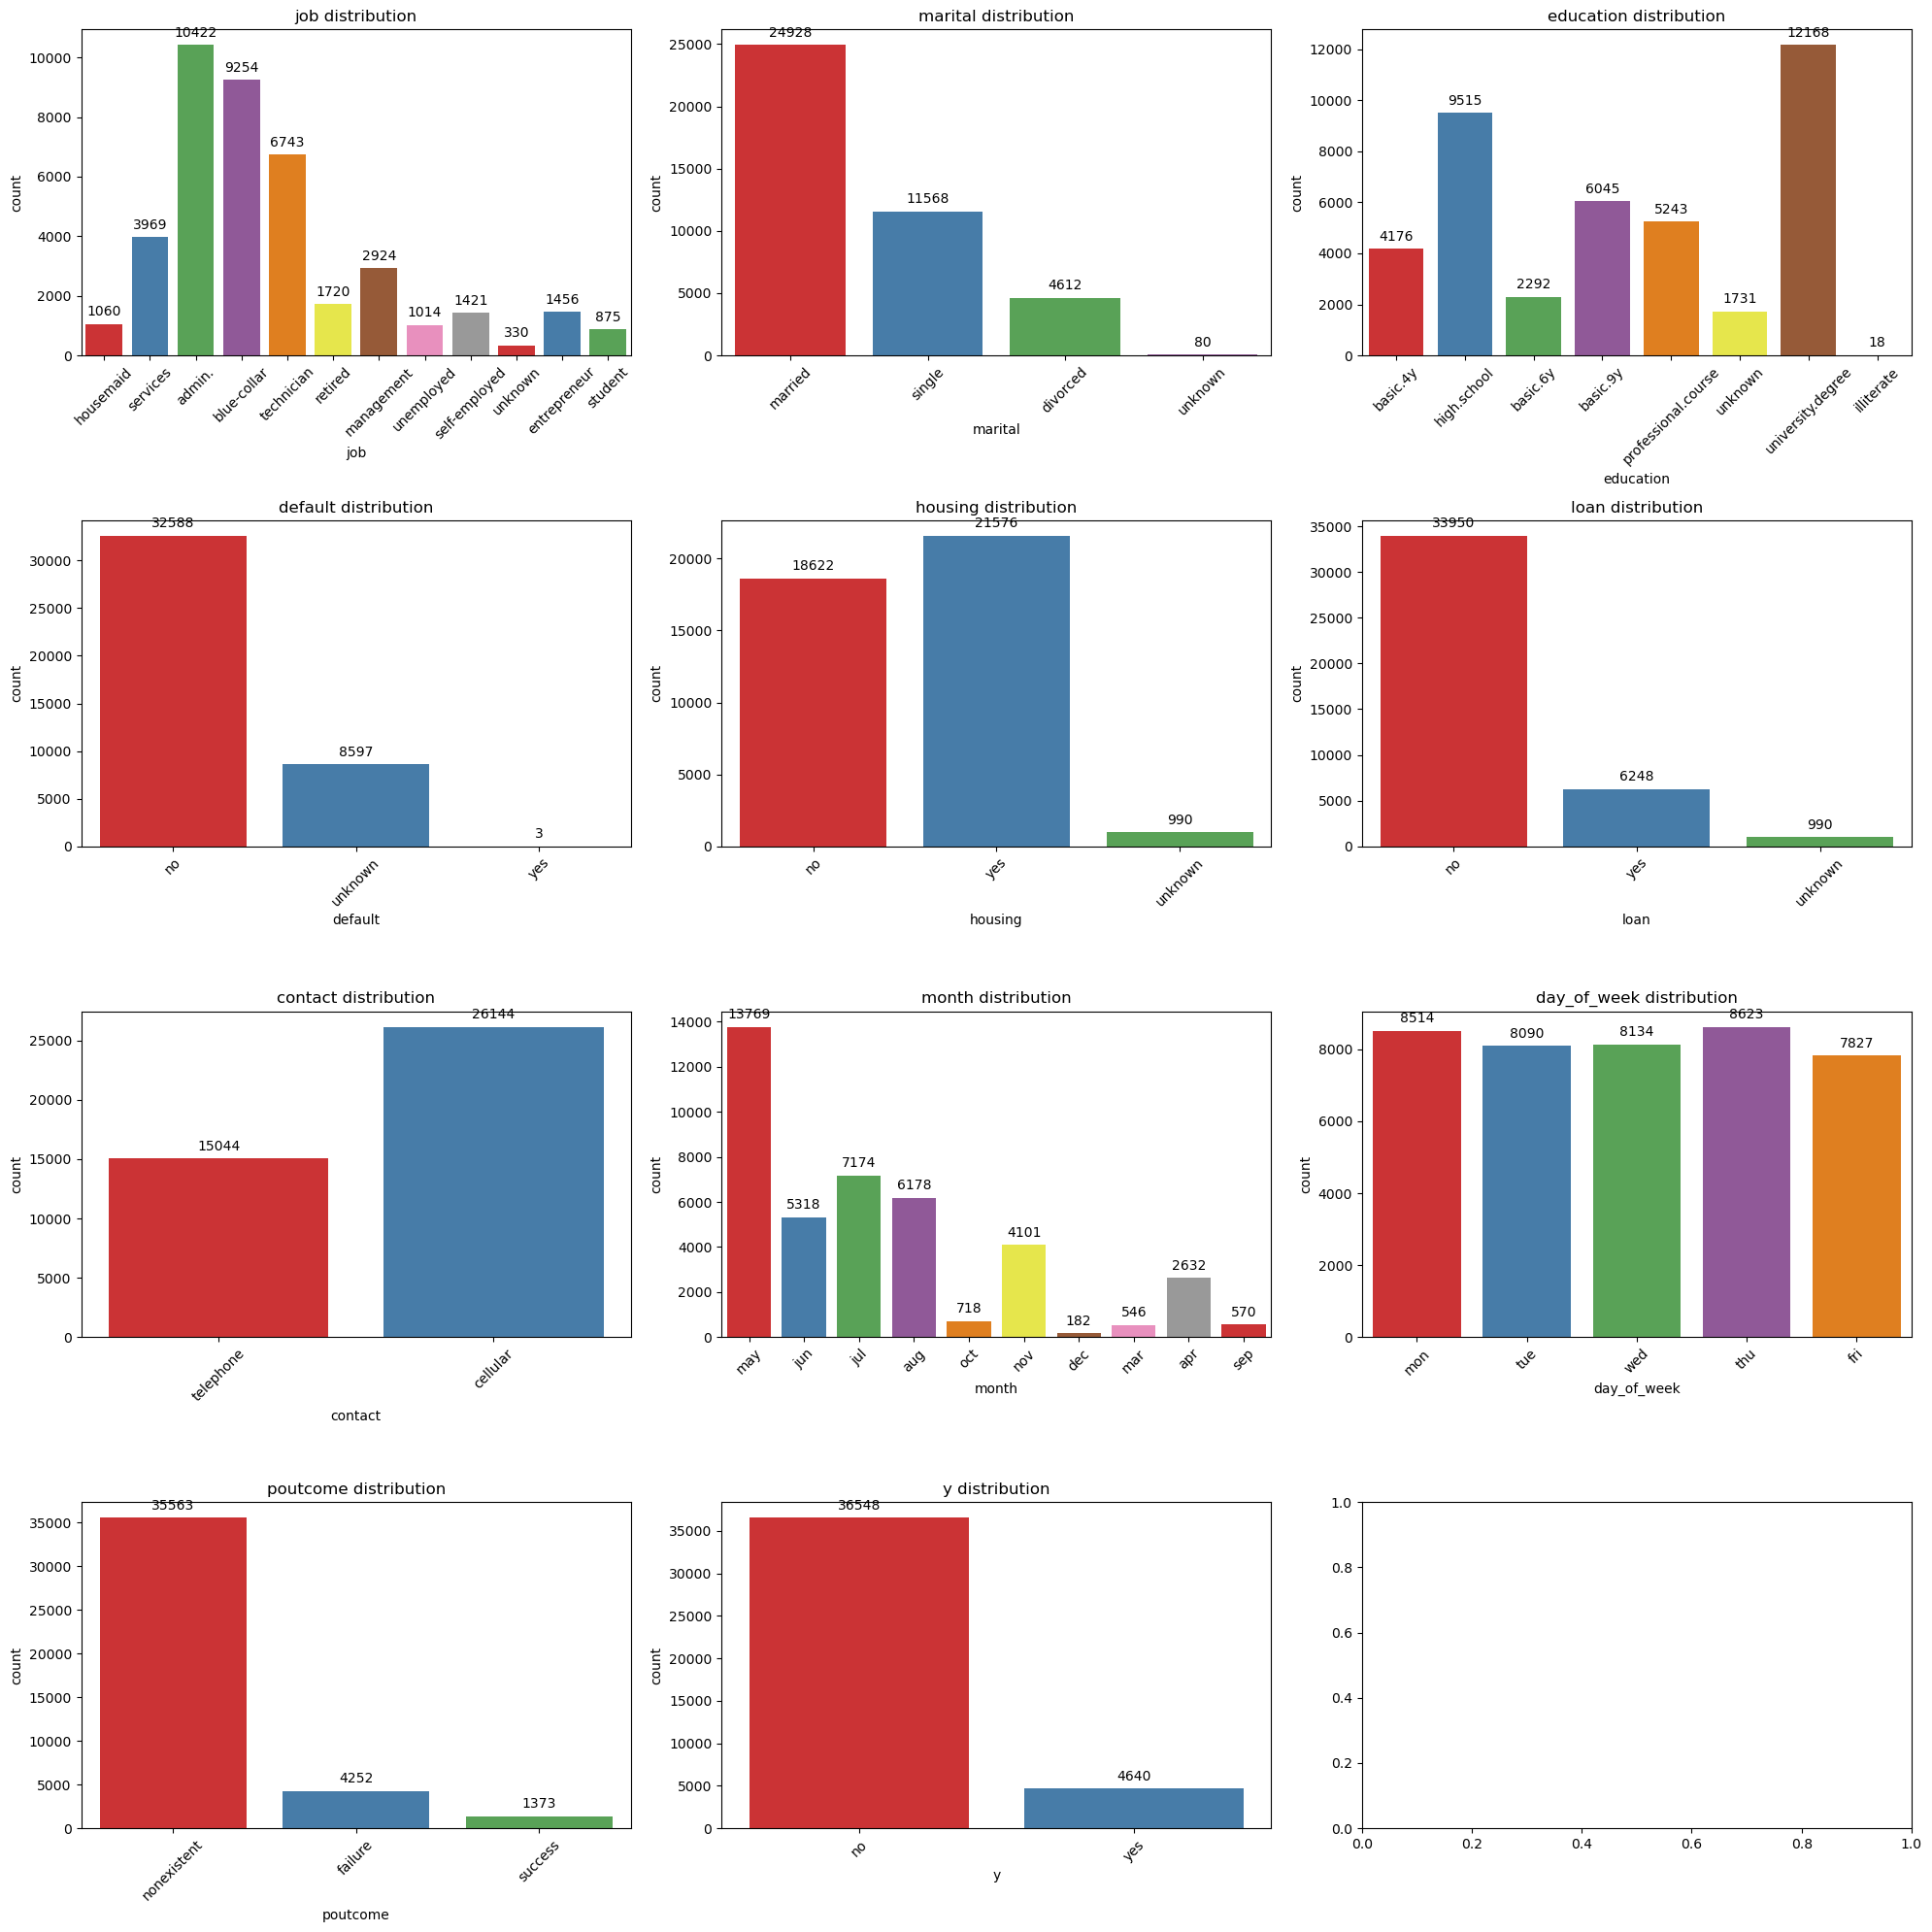

In [34]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    plot = sns.countplot(data=data, x=col, hue=col, palette='Set1', ax=ax[i//3, i%3], legend=False)
    ax[i//3, i%3].set_title(f'{col} distribution')
    ax[i//3, i%3].tick_params(axis='x', rotation=45)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [153]:
print(data.columns[data.columns.duplicated()])

Index([], dtype='object')


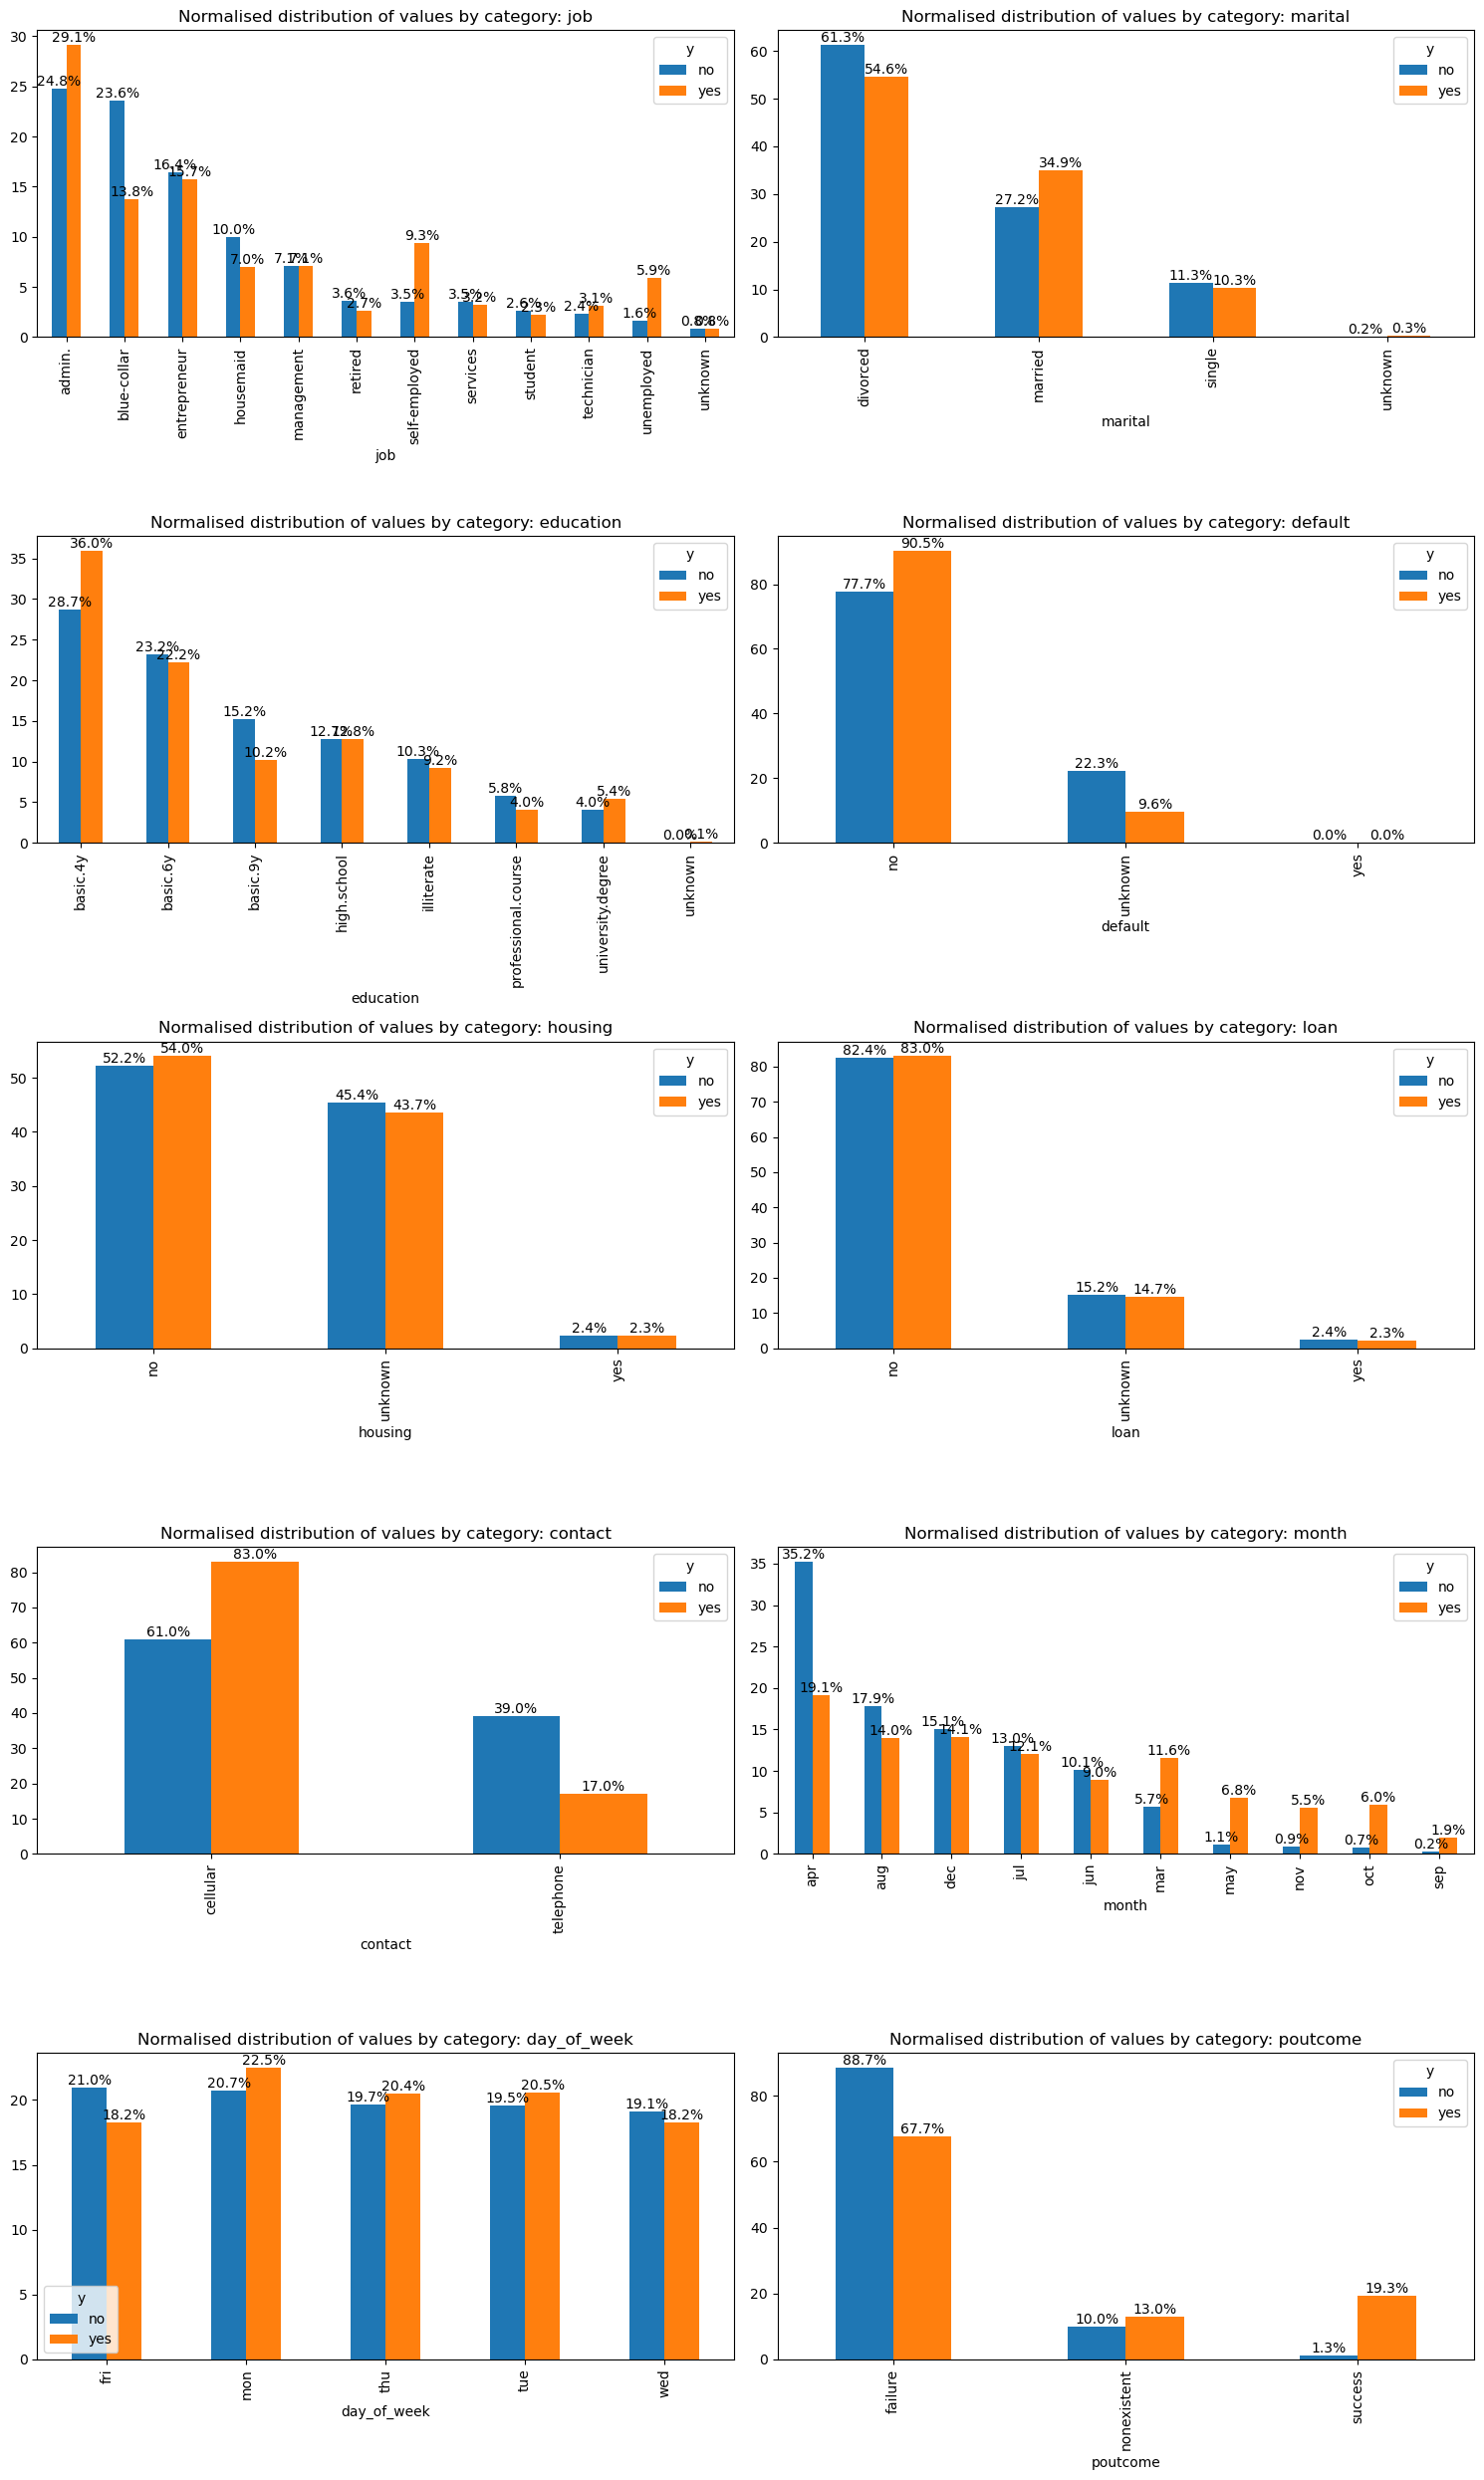

In [170]:
cat_cols_woY = cat_cols.copy()
cat_cols_woY.remove('y')
vp.create_subplots(data, cat_cols_woY)

In [ ]:
# vp.uni_cat_target_compare(data, 'education')
# vp.uni_cat_target_compare(data, 'job')
# vp.uni_cat_target_compare(data, 'marital')
# vp.uni_cat_target_compare(data, 'housing')
# vp.uni_cat_target_compare(data, 'loan')
# vp.uni_cat_target_compare(data, 'contact')
# vp.uni_cat_target_compare(data, 'month')
# vp.uni_cat_target_compare(data, 'day_of_week')
# vp.uni_cat_target_compare(data, 'poutcome')
# vp.uni_cat_target_compare(data, 'default')

In [ ]:
data_clear1 = data_clear[data_clear['target'] == 1]  
data_clear0 = data_clear[data_clear['target'] == 0]

THE CLIENT HAS TAKEN OUT A TERM DEPOSIT


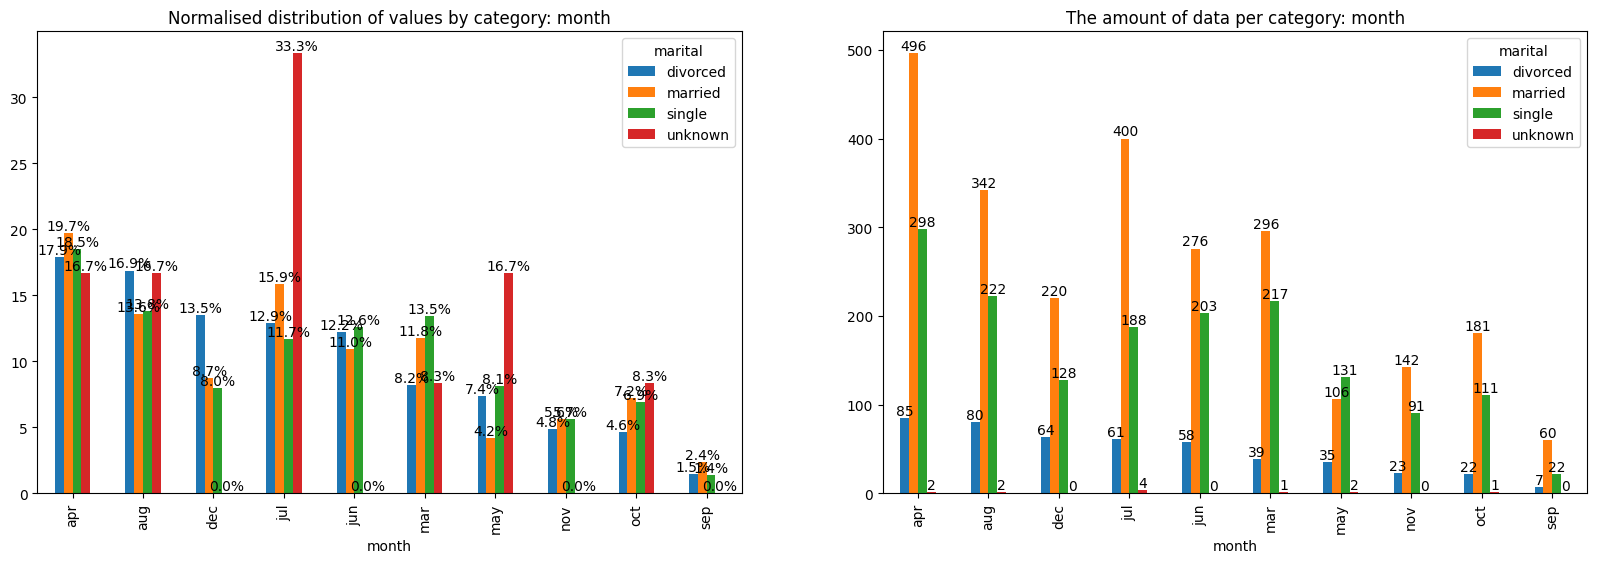

THE CLIENT HAS NOT TAKEN OUT A TERM DEPOSIT


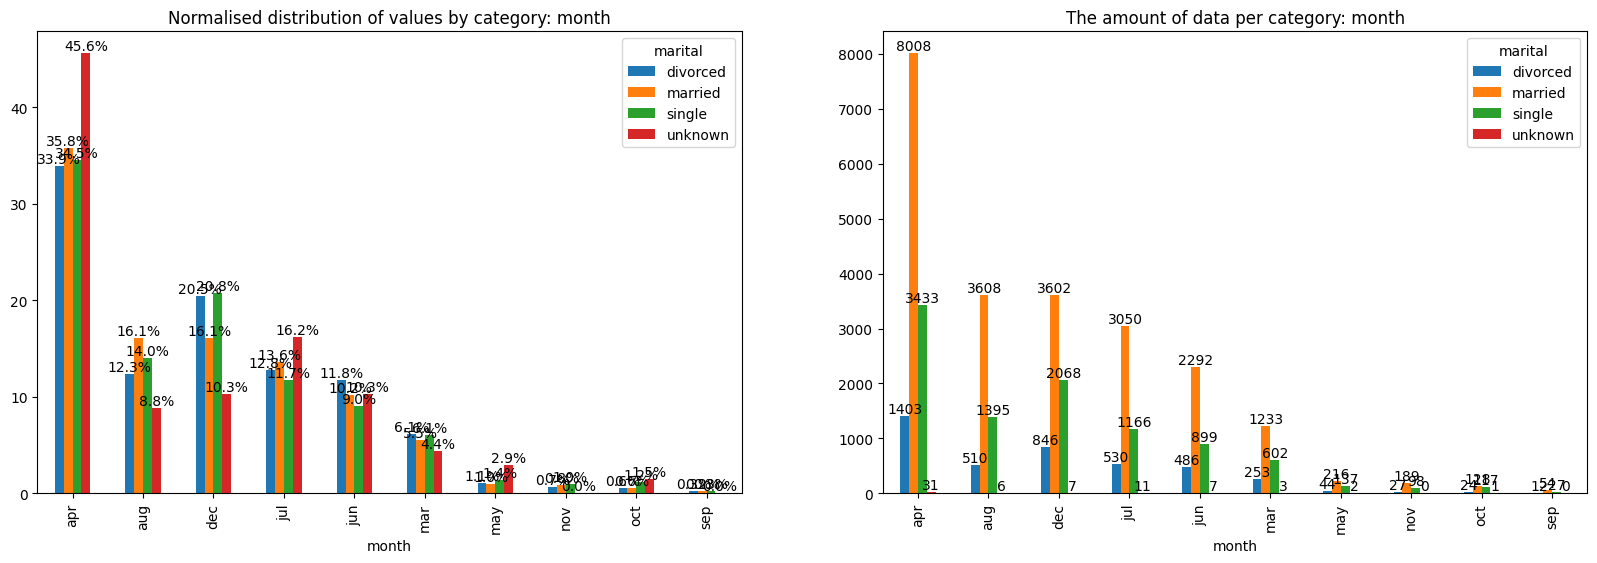

In [ ]:
vp.bi_countplot_target(data_clear0, data_clear1, 'month', 'marital')

In [ ]:
data_clear['target'].value_counts(), data_clear['target'].value_counts(normalize=True)

(target
 0    36525
 1     4616
 Name: count, dtype: int64,
 target
 0   0.89
 1   0.11
 Name: proportion, dtype: float64)

In [ ]:
dummies_data = pd.get_dummies(data,columns=data.select_dtypes(include='object').columns[:-1],drop_first=True,dtype=int)
dummies_data['y'] = dummies_data['y'].apply(lambda x : 0 if x=='no' else 1)

correlation_with_y = dummies_data.corr()['y'].sort_values()[:-1]
correlation_with_y.loc[abs(correlation_with_y)>0.1]

nr.employed                     -0.35
pdays                           -0.32
euribor3m                       -0.31
emp.var.rate                    -0.30
poutcome_nonexistent            -0.19
contact_telephone               -0.14
cons.price.idx                  -0.14
month_may                       -0.11
default_unknown                 -0.10
job_blue-collar                 -0.07
campaign                        -0.07
education_basic.9y              -0.05
marital_married                 -0.04
job_services                    -0.03
month_jul                       -0.03
education_basic.6y              -0.02
day_of_week_mon                 -0.02
job_entrepreneur                -0.02
month_nov                       -0.01
month_jun                       -0.01
month_aug                       -0.01
education_high.school           -0.01
job_housemaid                   -0.01
job_technician                  -0.01
job_self-employed               -0.00
loan_yes                        -0.00
default_yes 

In [ ]:
correlation_with_y.loc[abs(correlation_with_y)>0.1]

nr.employed            -0.35
pdays                  -0.32
euribor3m              -0.31
emp.var.rate           -0.30
poutcome_nonexistent   -0.19
contact_telephone      -0.14
cons.price.idx         -0.14
month_may              -0.11
month_sep               0.13
month_oct               0.14
month_mar               0.14
previous                0.23
poutcome_success        0.32
duration                0.41
y                       1.00
Name: y, dtype: float64

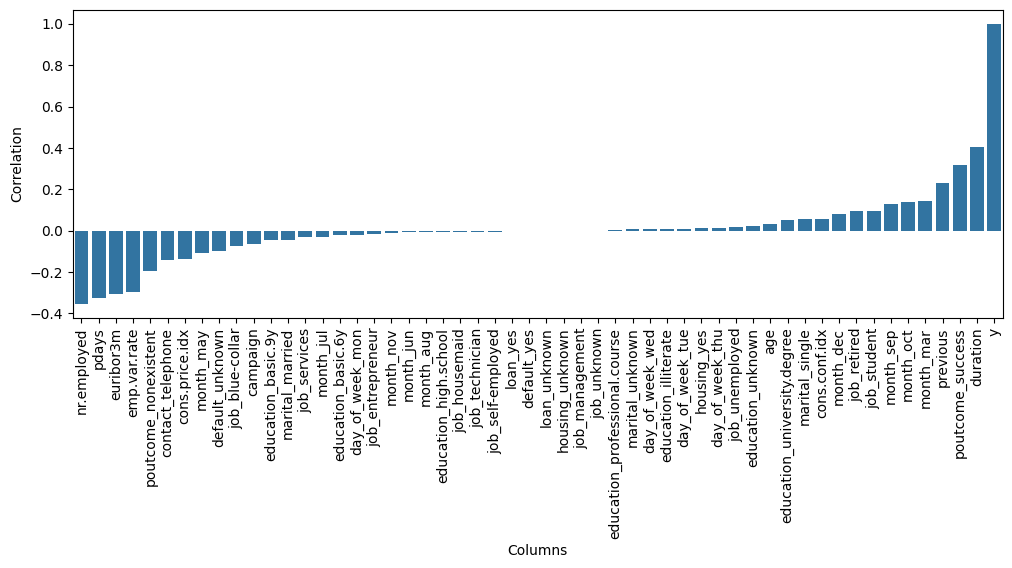

In [ ]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=correlation_with_y.index , y=correlation_with_y)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Correlation');

In [ ]:
print(f"Duplicate values count: {data_clear.duplicated().sum()}")
data_clear.loc[data_clear.duplicated(keep=False)].head(8)

Duplicate values count: 12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,0


In [ ]:
df = data_clear.drop_duplicates()

# Preprocessing

In [172]:
# df.to_csv('bank-additional-full-clean.csv', index=False)
df = pd.read_csv('bank-additional-full-clean.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


In [173]:
input_cols = df.drop(['target'], axis=1)
target_col = df['target']

numerical_cols = input_cols.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = input_cols.select_dtypes(include=['object']).columns

input_cols.shape, len(target_col), numerical_cols.shape, categorical_cols.shape


((41129, 19), 41129, (9,), (10,))

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41129 entries, 0 to 41128
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41129 non-null  int64  
 1   job             41129 non-null  object 
 2   marital         41129 non-null  object 
 3   education       41129 non-null  object 
 4   default         41129 non-null  object 
 5   housing         41129 non-null  object 
 6   loan            41129 non-null  object 
 7   contact         41129 non-null  object 
 8   month           41129 non-null  object 
 9   day_of_week     41129 non-null  object 
 10  campaign        41129 non-null  int64  
 11  pdays           41129 non-null  int64  
 12  previous        41129 non-null  int64  
 13  poutcome        41129 non-null  object 
 14  emp.var.rate    41129 non-null  float64
 15  cons.price.idx  41129 non-null  float64
 16  cons.conf.idx   41129 non-null  float64
 17  euribor3m       41129 non-null 

In [175]:

df.education.value_counts()

education
university.degree      12146
high.school             9500
basic.9y                6040
professional.course     5234
basic.4y                4172
basic.6y                2289
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [176]:
# Define mapping
education_mapping = {
    'university.degree': 'University Degree',

    'professional.course': 'Courses',
    'illiterate': 'Courses',
    
    'high.school': 'Secondary Education',
    'basic.9y': 'Basic Education',
    'basic.6y': 'Basic Education',
    'basic.4y': 'Junior Education',
    
    'unknown': 'Unknown',
    
}

# Apply mapping
df['education_grouped'] = df['education'].map(education_mapping)
df.drop('education', axis=1, inplace=True)

In [177]:

df['pdays_binary'] = np.where(df['pdays'] == 999, 0, 1)

# 2. Job Categorization
job_mapping = {
    'admin.': 'White-collar', 'management': 'White-collar', 'entrepreneur': 'White-collar',
    'self-employed': 'White-collar', 'technician': 'White-collar',
    'services': 'Blue-collar', 'blue-collar': 'Blue-collar', 'housemaid': 'Blue-collar',
    'student': 'Other', 'unemployed': 'Other', 'retired': 'Other', 'unknown': 'Other'
}
df['job_category'] = df['job'].map(job_mapping)
df.drop('job', axis=1, inplace=True)

# 3. Age Binning
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 50, np.inf], labels=['Young', 'Middle-aged', 'Senior'])
df.drop('age', axis=1, inplace=True)

# 4. Financial Stability Indicator
df['financial_risk'] = np.where(
    (df['default'] == 'yes') | ((df['housing'] == 'yes') & (df['loan'] == 'yes')),
    'High Risk', 'Low Risk'
)

# 5. Economic Indicators
df['employment_to_price'] = df['nr.employed'] / df['cons.price.idx']
df['economic_index'] = df['emp.var.rate'] + df['cons.conf.idx'] + df['euribor3m']



In [178]:
# Cyclical Encoding of Time Variables (better than one-hot encoding for models like gradient boosting):
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_num'] = df['month'].map(month_map)

# Create cyclical features for month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

# Mapping day of week to numerical values
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df['day_num'] = df['day_of_week'].map(day_map)

# Create cyclical features for day of the week
df['day_sin'] = np.sin(2 * np.pi * df['day_num'] / 5) 
df['day_cos'] = np.cos(2 * np.pi * df['day_num'] / 5)




In [179]:
# Assign seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month_num'].apply(get_season)

portuguese_bank_holidays = {
    1: ["New Year's Day"], 
    4: ["Good Friday"], 
    5: ["Labour Day"], 
    6: ["Portugal Day", "Corpus Christi"], 
    8: ["Assumption Day"], 
    10: ["Republic Day"], 
    11: ["All Saints' Day"], 
    12: ["Immaculate Conception", "Christmas Day"]
}

# Create a binary feature for whether a month has a banking holiday
df['has_holiday'] = df['month_num'].apply(lambda x: 1 if x in portuguese_bank_holidays else 0)


# correlated_positive_month = {
#     3: ["March"], 
#     9: ["October"], 
#     10: ["September"], 
#     12: ["December"]
# }

correlated_positive_month = {
    3: ["March"], 
    5: ["May"], 
    9: ["September"], 
    10: ["Oct"], 
    11: ["Nov"]
}

# Create a binary feature for whether a month has a banking holiday
df['month_positive'] = df['month_num'].apply(lambda x: 1 if x in correlated_positive_month else 0)

# Drop intermediate columns (optional)
# df.drop(columns=['month', 'month_num'], inplace=True)
# Drop original month and day_of_week columns (optional)
df.drop(columns=['month', 'day_of_week', 'month_num', 'day_num'], inplace=True)
# Display transformed dataset
print(df.head())


   marital  default housing loan    contact  campaign  pdays  previous  \
0  married       no      no   no  telephone         1    999         0   
1  married  unknown      no   no  telephone         1    999         0   
2  married       no     yes   no  telephone         1    999         0   
3  married       no      no   no  telephone         1    999         0   
4  married       no      no  yes  telephone         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent          1.10           93.99         -36.40       4.86   
1  nonexistent          1.10           93.99         -36.40       4.86   
2  nonexistent          1.10           93.99         -36.40       4.86   
3  nonexistent          1.10           93.99         -36.40       4.86   
4  nonexistent          1.10           93.99         -36.40       4.86   

   nr.employed  target    education_grouped  pdays_binary  job_category  \
0      5191.00       0     Junior E

In [180]:
df.head()

,marital,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,education_grouped,pdays_binary,job_category,age_group,financial_risk,employment_to_price,economic_index,month_sin,month_cos,day_sin,day_cos,season,has_holiday,month_positive
0,married,no,no,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,Junior Education,0,Blue-collar,Senior,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
1,married,unknown,no,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,Secondary Education,0,Blue-collar,Senior,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
2,married,no,yes,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,Secondary Education,0,Blue-collar,Middle-aged,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
3,married,no,no,no,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,Basic Education,0,White-collar,Middle-aged,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1
4,married,no,no,yes,telephone,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0,Secondary Education,0,Blue-collar,Senior,Low Risk,55.23,-30.44,0.50,-0.87,0.95,0.31,Spring,1,1


In [108]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(input_cols, target_col, test_size=0.2, random_state=42, stratify=target_col)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [109]:
# y_test.value_counts(normalize=True), y_train.value_counts(normalize=True)

In [110]:
# df['y'] = df['y'].apply(lambda x : 0 if x=='no' else 1)
# df.drop(columns=['y'], inplace=True)
# df.drop(columns=['duration'], inplace=True)

In [181]:
from  process_bank_churn import preprocess_data, preprocess_new_data

data_processed = preprocess_data(df, target='target')


data_processed['train_X'].shape, data_processed['train_y'].shape, data_processed['val_X'].shape, data_processed['val_y'].shape

Index(['marital', 'default', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target',
       'education_grouped', 'pdays_binary', 'job_category', 'age_group',
       'financial_risk', 'employment_to_price', 'economic_index', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'season', 'has_holiday',
       'month_positive'],
      dtype='object') Index(['marital', 'default', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target',
       'education_grouped', 'pdays_binary', 'job_category', 'age_group',
       'financial_risk', 'employment_to_price', 'economic_index', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'season', 'has_holiday',
       'month_positive'],
      dtype='object')


((32903, 48), (32903,), (8226, 48), (8226,))

In [182]:
data_processed['train_X'].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_binary,employment_to_price,economic_index,month_sin,month_cos,day_sin,day_cos,has_holiday,month_positive,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,education_grouped_Basic Education,education_grouped_Courses,education_grouped_Junior Education,education_grouped_Secondary Education,education_grouped_University Degree,education_grouped_Unknown,job_category_Blue-collar,job_category_Other,job_category_White-collar,financial_risk_Low Risk,season_Autumn,season_Spring,season_Summer,season_Winter
18159,-0.20,0.20,-0.35,0.84,0.59,-0.47,0.77,0.85,-0.20,0.68,0.08,-0.74,-0.51,-0.82,-1.16,-1.99,-0.96,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
9274,-0.20,0.20,-0.35,0.84,1.53,-0.28,0.78,0.85,-0.20,0.19,0.22,0.10,-0.75,0.00,1.43,0.50,-0.96,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
15831,-0.57,0.20,-0.35,0.84,0.59,-0.47,0.77,0.85,-0.20,0.68,0.07,-0.74,-0.51,1.34,0.44,-1.99,-0.96,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
28677,-0.57,0.20,-0.35,-1.20,-0.86,-1.42,-1.27,-0.94,-0.20,-0.65,-1.70,1.57,0.14,-1.33,0.44,0.50,-0.96,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
30936,-0.20,0.20,-0.35,-1.20,-1.18,-1.23,-1.31,-0.94,-0.20,-0.49,-1.57,0.95,-0.51,0.83,-1.16,0.50,1.05,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00


In [183]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, average_precision_score

def evaluate_model(model, X, y):
    """
    Evaluate the model on the given dataset (X, y) and return metrics.
    """
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        'f1': round(f1_score(y, y_pred), 4),
        'recall': round(recall_score(y, y_pred), 4),
        'precision': round(precision_score(y, y_pred), 4),
        'average_precision': round(average_precision_score(y, y_prob), 4) if y_prob is not None else None
    }

    cm = confusion_matrix(y, y_pred)
    return metrics, cm

def evaluation(model, data_processed):
    """
    Evaluate the model on both training and validation datasets.
    """
    # Train the model
    model.fit(data_processed['train_X'], data_processed['train_y'])

    # Evaluate on training data
    train_metrics, cm_train = evaluate_model(model, data_processed['train_X'], data_processed['train_y'])

    # Evaluate on validation data
    val_metrics, cm_val = evaluate_model(model, data_processed['val_X'], data_processed['val_y'])

    # Combine results into a single output dictionary
    output = {
        'train': train_metrics,
        'val': val_metrics
    }

    # Print confusion matrices
    print('Confusion matrix train: \n', cm_train)
    print('Confusion matrix val: \n', cm_val)

    return output

In [114]:
# from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, average_precision_score
# def evaluation(model, data_processed):

#     model.fit(data_processed['train_X'], data_processed['train_y'])

#     y_pred = model.predict(data_processed['train_X'])
#     f1_train = round(f1_score(data_processed['train_y'], y_pred), 4)
#     recall_train = round(recall_score(data_processed['train_y'], y_pred), 4)
#     precision_train = round(precision_score(data_processed['train_y'], y_pred), 4)

#     y_prob = model.predict_proba(data_processed['train_X'])[:, 1]
#     average_precision = round(average_precision_score(data_processed['train_y'], y_prob), 4)

#     y_pred_val = model.predict(data_processed['val_X'])
#     f1_val = round(f1_score(data_processed['val_y'], y_pred_val), 4)
#     recall_val = round(recall_score(data_processed['val_y'], y_pred_val), 4)
#     precision_val = round(precision_score(data_processed['val_y'], y_pred_val), 4)

#     y_prob_val = model.predict_proba(data_processed['val_X'])[:, 1]
#     average_precision_val = round(average_precision_score(data_processed['val_y'], y_prob_val), 4)

#     output = {'f1_train': f1_train, 'recall_train': recall_train, 'precision_train': precision_train, 'average_precision_train': average_precision,
#               'f1_val': f1_val, 'recall_val': recall_val, 'precision_val': precision_val, 'average_precision_val': average_precision_val}
    
#     cm_val = confusion_matrix(data_processed['val_y'], y_pred_val)
#     cm_train = confusion_matrix(data_processed['train_y'], y_pred)
#     print('Confusion matrix train: \n', cm_train)
#     print('Confusion matrix val: \n', cm_val)

#     return output

# def metrics(y_pred, y_true):
#     f1 = round(f1_score(y_true, y_pred), 4)
#     recall = round(recall_score(y_true, y_pred), 4)
#     precision = round(precision_score(y_true, y_pred), 4)
#     return f1, recall, precision



In [184]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
eval_regression = evaluation(regression, data_processed)
eval_regression


Confusion matrix train: 
 [[25072  4139]
 [ 1387  2305]]
Confusion matrix val: 
 [[6290 1013]
 [ 349  574]]


{'train': {'f1': 0.4548,
  'recall': 0.6243,
  'precision': 0.3577,
  'average_precision': 0.4444},
 'val': {'f1': 0.4574,
  'recall': 0.6219,
  'precision': 0.3617,
  'average_precision': 0.4463}}

In [185]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
eval_knn = evaluation(knn, data_processed)
eval_knn

Confusion matrix train: 
 [[28644   567]
 [ 2391  1301]]
Confusion matrix val: 
 [[7105  198]
 [ 674  249]]


{'train': {'f1': 0.468,
  'recall': 0.3524,
  'precision': 0.6965,
  'average_precision': 0.5376},
 'val': {'f1': 0.3635,
  'recall': 0.2698,
  'precision': 0.557,
  'average_precision': 0.3641}}

In [186]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42,
                                 max_depth=12,
                                 min_samples_split=3,
                                 class_weight='balanced')
eval_tree = evaluation(tree, data_processed)
eval_tree

Confusion matrix train: 
 [[25354  3857]
 [ 1043  2649]]
Confusion matrix val: 
 [[6275 1028]
 [ 390  533]]


{'train': {'f1': 0.5195,
  'recall': 0.7175,
  'precision': 0.4072,
  'average_precision': 0.5956},
 'val': {'f1': 0.4291,
  'recall': 0.5775,
  'precision': 0.3414,
  'average_precision': 0.3915}}

In [192]:
import xgboost as xgb

count_0 = sum(data_processed['train_y'] == 0)
count_1 = sum(data_processed['train_y'] == 1)
scale_pos_weight = count_0 / count_1

xgb_model = xgb.XGBClassifier(random_state=42, 
                                n_estimators=70, max_depth=15, learning_rate=0.01, scale_pos_weight=scale_pos_weight)
eval_xgb = evaluation(xgb_model, data_processed)
eval_xgb


Confusion matrix train: 
 [[25973  3238]
 [  717  2975]]
Confusion matrix val: 
 [[6312  991]
 [ 407  516]]


{'train': {'f1': 0.6007,
  'recall': 0.8058,
  'precision': 0.4788,
  'average_precision': 0.6939},
 'val': {'f1': 0.4247,
  'recall': 0.559,
  'precision': 0.3424,
  'average_precision': 0.4086}}

In [193]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def convert_int_params(params):
    int_params = ['n_estimators', 'max_depth', 'min_child_weight']
    for param in int_params:
        params[param] = int(params[param])
    return params

def create_model (params):
    """
    Create a XGBClassifier based on the hyperparameters (for optimization or best one). 
    Return the model.
    """
    params = convert_int_params(params)
      
    clf = xgb.XGBClassifier(
    n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        min_child_weight=params['min_child_weight'],  # Мінімальна сума ваг всіх вибірок, необхідна в кінцевому вузлі
        subsample=params['subsample'],  # Частка вибірок, що використовуються для побудови кожного дерева
        colsample_bytree=params['colsample_bytree'],  # Частка ознак, що використовуються при побудові кожного дерева
        gamma=params['gamma'],  # Мінімальне зменшення втрат, необхідне для виконання поділу
        reg_alpha=params['reg_alpha'],  # Параметр регуляризації L1 (Lasso)
        reg_lambda=params['reg_lambda'],  # Параметр регуляризації L2 (Ridge)
        enable_categorical=True,
        eta = params['eta'],
        missing=np.nan,
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        eval_metric='pre' 
    )
    return clf

In [194]:
eval_xgb

{'train': {'f1': 0.6007,
  'recall': 0.8058,
  'precision': 0.4788,
  'average_precision': 0.6939},
 'val': {'f1': 0.4247,
  'recall': 0.559,
  'precision': 0.3424,
  'average_precision': 0.4086}}

In [195]:

def objective(params):

    clf = create_model(params)

    clf.fit(
        data_processed['train_X'],
        data_processed['train_y'],
        eval_set=[(data_processed['val_X'], data_processed['val_y'])],
        verbose=False)
    eval_clf = evaluation(clf, data_processed)
    # pred, auc = evaluate_model(clf, data_processed['test_X'], data_processed['test_y'], show=False)
    return {'loss': -eval_clf.get('val').get('f1'), 'status': STATUS_OK}

# Простір гіперпараметрів
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
    'max_depth': hp.quniform('max_depth', 10, 30, 1),
    'min_child_weight': hp.quniform('min_child_weight', 5, 20, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'eta': hp.uniform('eta', 0.01, 0.9)
}

# Оптимізація
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals = 30, trials=trials)

print("Найкращі гіперпараметри: ", best)

# Навчання фінальної моделі з найкращими гіперпараметрами
final_clf = create_model(best)

final_clf.fit(data_processed['train_X'], data_processed['train_y'])

# Оцінка фінальної моделі
eval_clf_best = evaluation(final_clf, data_processed)

print("Найкращі гіперпараметри: ", best)
eval_clf_best

Confusion matrix train:                               

[[25290  3921]                                        
 [  757  2935]]
Confusion matrix val:                                 

[[6237 1066]                                          
 [ 346  577]]
Confusion matrix train:                                              

[[25791  3420]                                                       
 [  402  3290]]
Confusion matrix val:                                                

[[6301 1002]                                                         
 [ 377  546]]
Confusion matrix train:                                              

[[25434  3777]                                                       
 [  834  2858]]
Confusion matrix val:                                                

[[6284 1019]                                                         
 [ 340  583]]
Confusion matrix train:                                              

[[25727  3484]                                       

{'train': {'f1': 0.5077,
  'recall': 0.6723,
  'precision': 0.4078,
  'average_precision': 0.5396},
 'val': {'f1': 0.4829,
  'recall': 0.6273,
  'precision': 0.3925,
  'average_precision': 0.4702}}

# feature importance


In [196]:
data_processed = preprocess_data(df, target='target', scaler_numeric= False)
data_processed['train_X'].head()

Index(['marital', 'default', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target',
       'education_grouped', 'pdays_binary', 'job_category', 'age_group',
       'financial_risk', 'employment_to_price', 'economic_index', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'season', 'has_holiday',
       'month_positive'],
      dtype='object') Index(['marital', 'default', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target',
       'education_grouped', 'pdays_binary', 'job_category', 'age_group',
       'financial_risk', 'employment_to_price', 'economic_index', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'season', 'has_holiday',
       'month_positive'],
      dtype='object')


,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_binary,employment_to_price,economic_index,month_sin,month_cos,day_sin,day_cos,has_holiday,month_positive,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,education_grouped_Basic Education,education_grouped_Courses,education_grouped_Junior Education,education_grouped_Secondary Education,education_grouped_University Degree,education_grouped_Unknown,job_category_Blue-collar,job_category_Other,job_category_White-collar,financial_risk_Low Risk,season_Autumn,season_Spring,season_Summer,season_Winter
18159,2,999,0,1.40,93.92,-42.70,4.96,5228.10,0,55.67,-36.34,-0.50,-0.87,-0.59,-0.81,0,0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
9274,2,999,0,1.40,94.47,-41.80,4.97,5228.10,0,55.34,-35.43,0.00,-1.00,-0.00,1.00,1,0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00
15831,1,999,0,1.40,93.92,-42.70,4.96,5228.10,0,55.67,-36.34,-0.50,-0.87,0.95,0.31,0,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
28677,1,999,0,-1.80,93.08,-47.10,1.41,5099.10,0,54.78,-47.49,0.87,-0.50,-0.95,0.31,1,0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
30936,2,999,0,-1.80,92.89,-46.20,1.34,5099.10,0,54.89,-46.66,0.50,-0.87,0.59,-0.81,1,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00


In [123]:
# tree

In [197]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
}

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_random = RandomizedSearchCV(dt, param_distributions=params_dt, n_iter=40, cv=3, scoring='roc_auc', verbose=1)
dt_random.fit(data_processed['train_X'], data_processed['train_y'])

print (f"Best params: {dt_random.best_params_}")
dt_random_search_best = dt_random.best_estimator_

y_val_dt = dt_random_search_best.predict_proba(data_processed['val_X'])[:, 1]
y_train_dt = dt_random_search_best.predict_proba(data_processed['train_X'])[:, 1]

eval_dt = evaluation(dt_random_search_best, data_processed)
eval_dt

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best params: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 18, 'max_features': 'sqrt', 'max_depth': 18, 'criterion': 'entropy'}
Confusion matrix train: 
 [[26015  3196]
 [ 1494  2198]]
Confusion matrix val: 
 [[6539  764]
 [ 389  534]]


{'train': {'f1': 0.4838,
  'recall': 0.5953,
  'precision': 0.4075,
  'average_precision': 0.3965},
 'val': {'f1': 0.4809,
  'recall': 0.5785,
  'precision': 0.4114,
  'average_precision': 0.3946}}

[Text(0.625, 0.875, 'pdays_binary <= 0.5\nentropy = 1.0\nsamples = 32903\nvalue = [16451.5, 16451.5]'),
 Text(0.5, 0.625, 'economic_index <= -38.671\nentropy = 0.991\nsamples = 31664\nvalue = [16198.062, 12935.727]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'has_holiday <= 0.5\nentropy = 0.976\nsamples = 7819\nvalue = [3722.721, 5387.287]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'employment_to_price <= 55.141\nentropy = 0.956\nsamples = 23845\nvalue = [12475.341, 7548.44]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'entropy = 0.356\nsamples = 1239\nvalue = [253.438, 3515.773]'),
 Text(0.6875, 0.75, '  False')]

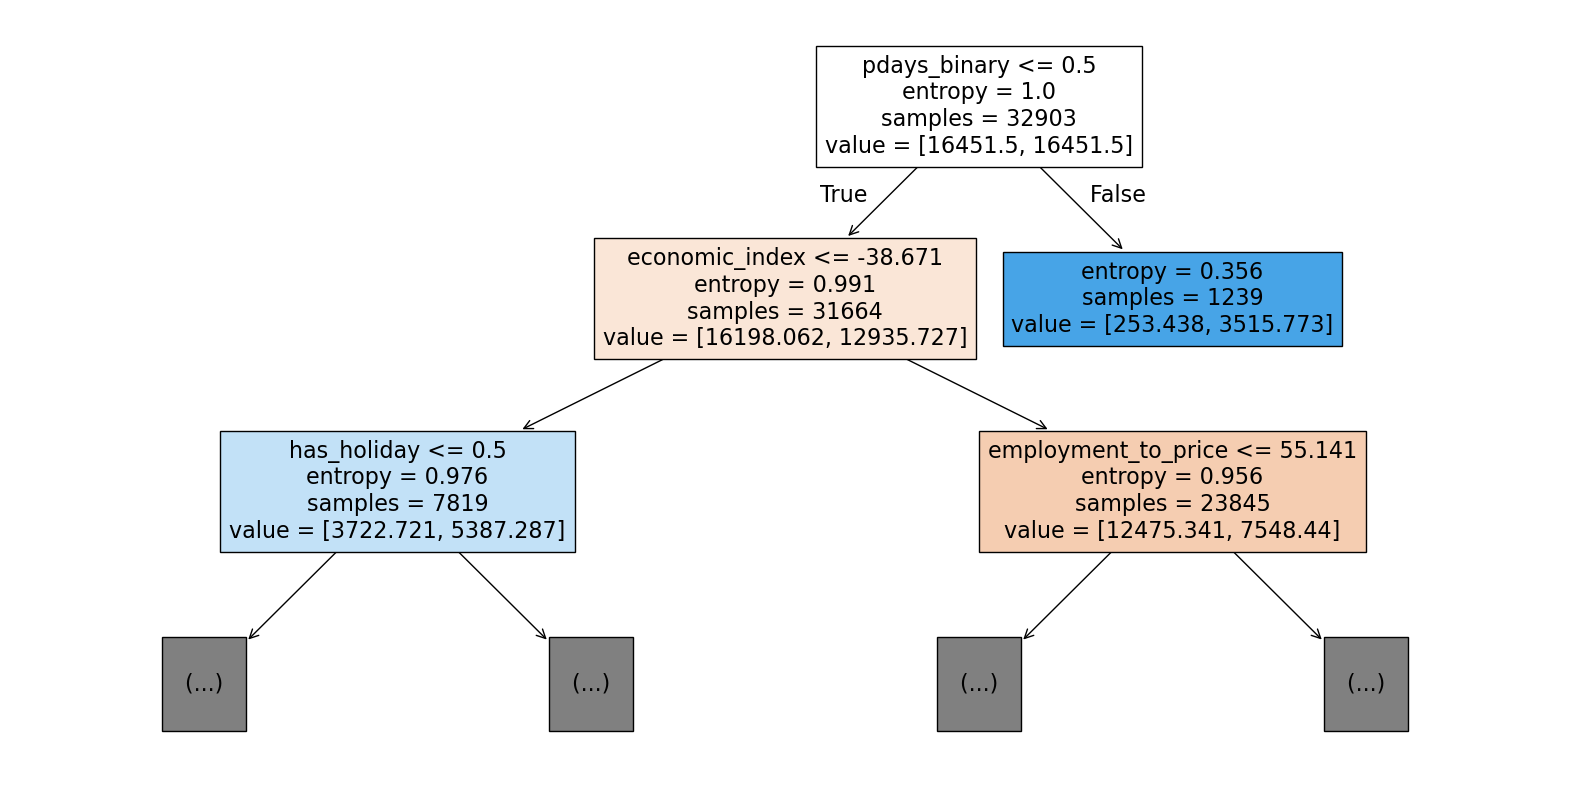

In [198]:


from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_random_search_best, feature_names=list(data_processed['train_X'].columns), filled=True, max_depth=2)



In [200]:
data_processed['train_X'].columns

Index(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_binary',
       'employment_to_price', 'economic_index', 'month_sin', 'month_cos',
       'day_sin', 'day_cos', 'has_holiday', 'month_positive',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success',
       'education_grouped_Basic Education', 'education_grouped_Courses',
       'education_grouped_Junior Education',
       'education_grouped_Secondary Education',
       'education_grouped_University Degree', 'education_grouped_Unknown',
       'job_category_Blue-collar', 'job_category_Other',
       'job_category_White-collar', 'financial_risk_Low Risk', 'season_Autumn',
       'seaso

In [201]:


impotents = dt_random_search_best.feature_importances_
df_important = pd.DataFrame({'feature': data_processed['train_X'].columns, 'importance': impotents})
df_important.sort_values('importance', ascending=False).iloc[:10]



,feature,importance
8,pdays_binary,0.37
9,employment_to_price,0.33
10,economic_index,0.17
4,cons.price.idx,0.05
15,has_holiday,0.04
31,poutcome_failure,0.01
45,season_Spring,0.01
38,education_grouped_University Degree,0.01
19,marital_single,0.00
41,job_category_Other,0.00


In [88]:
# df['nr.employed'].value_counts()

<Axes: xlabel='feature'>

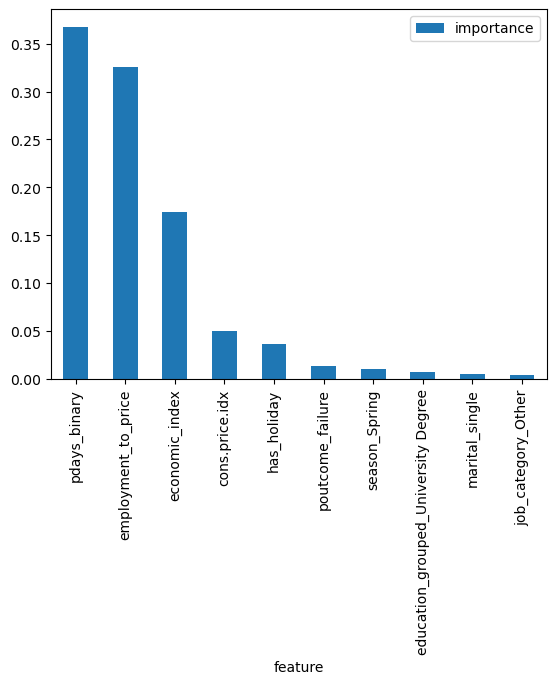

In [202]:
df_important.sort_values('importance', ascending=False).iloc[:10].plot(kind='bar', x='feature', y='importance')

In [203]:
from sklearn.ensemble import RandomForestClassifier 

params_rf = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [5, 7, 10, 20, ],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=params_rf, n_iter=30, cv=3, scoring='f1', verbose=1)
rf_random.fit(data_processed['train_X'], data_processed['train_y'])
              
print (f"Best params: {rf_random.best_params_}")
rf_random_search_best = rf_random.best_estimator_

eval_rf = evaluation(rf_random_search_best, data_processed)
eval_rf

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': 'balanced_subsample', 'bootstrap': True}
Confusion matrix train: 
 [[25961  3250]
 [ 1360  2332]]
Confusion matrix val: 
 [[6514  789]
 [ 360  563]]


{'train': {'f1': 0.5029,
  'recall': 0.6316,
  'precision': 0.4178,
  'average_precision': 0.5723},
 'val': {'f1': 0.4949,
  'recall': 0.61,
  'precision': 0.4164,
  'average_precision': 0.4755}}

<Axes: xlabel='feature'>

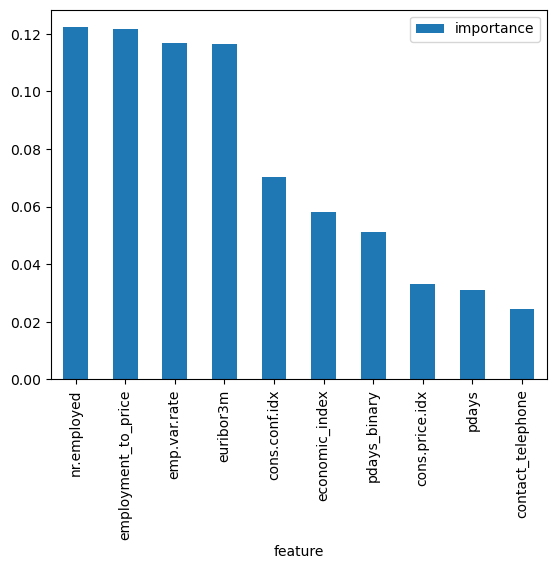

In [204]:
importance = rf_random_search_best.feature_importances_
df_important_rf = pd.DataFrame({'feature': data_processed['train_X'].columns, 'importance': importance})
df_important_rf.sort_values('importance', ascending=False).iloc[:10].plot(kind='bar', x='feature', y='importance')

In [205]:
df_important_rf.sort_values('importance', ascending=False).iloc[:10]

,feature,importance
7,nr.employed,0.12
9,employment_to_price,0.12
3,emp.var.rate,0.12
6,euribor3m,0.12
5,cons.conf.idx,0.07
10,economic_index,0.06
8,pdays_binary,0.05
4,cons.price.idx,0.03
1,pdays,0.03
30,contact_telephone,0.02


In [206]:
from imblearn.ensemble import BalancedBaggingClassifier

In [207]:
from sklearn.model_selection import RandomizedSearchCV

params_bagging = {  
    'n_estimators': np.arange(10, 100, 10),
    'max_samples': np.arange(0.5, 1.0, 0.1),
    'max_features': np.arange(0.5, 1.0, 0.1),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), random_state=42, sampling_strategy='not minority')

bbc_random = RandomizedSearchCV(bbc, param_distributions=params_bagging, n_iter=30, cv=3, scoring='f1', verbose=1)

bbc_random.fit(data_processed['train_X'], data_processed['train_y'])
print (f"Best params: {bbc_random.best_params_}")
bbc_random_search_best = bbc_random.best_estimator_



eval_bbc = evaluation(bbc_random_search_best, data_processed)
eval_bbc

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'n_estimators': 80, 'max_samples': 0.5, 'max_features': 0.5, 'bootstrap_features': True, 'bootstrap': True}
Confusion matrix train: 
 [[25544  3667]
 [  909  2783]]
Confusion matrix val: 
 [[6357  946]
 [ 341  582]]


{'train': {'f1': 0.5488,
  'recall': 0.7538,
  'precision': 0.4315,
  'average_precision': 0.684},
 'val': {'f1': 0.4749,
  'recall': 0.6306,
  'precision': 0.3809,
  'average_precision': 0.4624}}

In [208]:
balanced_bagging_classfier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                                sampling_strategy='not minority',
                                max_features=0.7,
                                n_estimators = 87,
                                random_state=42)

balanced_bagging_classfier.fit(data_processed['train_X'], data_processed['train_y'])

eval_balanced_bagging_classfier = evaluation(balanced_bagging_classfier, data_processed)
eval_balanced_bagging_classfier

Confusion matrix train: 
 [[25358  3853]
 [  141  3551]]
Confusion matrix val: 
 [[6163 1140]
 [ 353  570]]


{'train': {'f1': 0.6401,
  'recall': 0.9618,
  'precision': 0.4796,
  'average_precision': 0.8446},
 'val': {'f1': 0.433,
  'recall': 0.6176,
  'precision': 0.3333,
  'average_precision': 0.442}}

In [209]:
full_eval = pd.DataFrame({'Logistic Regression': eval_regression['val'], 'KNN': eval_knn['val'], 'Decision Tree': eval_tree['val'], 'XGBoost': eval_clf_best['val'], 'Random Forest': eval_rf['val'], 'Balanced Bagging': eval_balanced_bagging_classfier['val']})
full_eval = full_eval.T

In [210]:
fulltrain_test_eval = pd.DataFrame({'Logistic Regression': eval_regression['train'], 'KNN': eval_knn['train'], 'Decision Tree': eval_tree['train'], 'XGBoost': eval_clf_best['train'], 'Random Forest': eval_rf['train'], 'Balanced Bagging': eval_balanced_bagging_classfier['train']})
fulltrain_test_eval=fulltrain_test_eval.T

In [211]:
final_eval = pd.concat([full_eval, fulltrain_test_eval], keys=['Validation', 'Train'], axis=1)
final_eval.drop('recall', axis=1, level=1, inplace=True)
final_eval.drop('precision', axis=1, level=1, inplace=True)
# final_eval.to_csv('final_eval.csv')
final_eval 

Validation                   Train                  
                            f1 average_precision    f1 average_precision
Logistic Regression       0.46              0.45  0.45              0.44
KNN                       0.36              0.36  0.47              0.54
Decision Tree             0.43              0.39  0.52              0.60
XGBoost                   0.48              0.47  0.51              0.54
Random Forest             0.49              0.48  0.50              0.57
Balanced Bagging          0.43              0.44  0.64              0.84

In [61]:
# ! pip install h2o

  Using cached h2o-3.46.0.6-py2.py3-none-any.whl
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [68]:
# import h2o
# from h2o.automl import H2OAutoML

# h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.271-b09, mixed mode)
  Starting server from C:\Users\Olha Shaposhnyk\anaconda3\envs\ml_course\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\OLHASH~1\AppData\Local\Temp\tmp67a2kvuv
  JVM stdout: C:\Users\OLHASH~1\AppData\Local\Temp\tmp67a2kvuv\h2o_Olha_Shaposhnyk_started_from_python.out
  JVM stderr: C:\Users\OLHASH~1\AppData\Local\Temp\tmp67a2kvuv\h2o_Olha_Shaposhnyk_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 18 days
H2O_cluster_name:,H2O_from_python_Olha_Shaposhnyk_489buq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.17 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [71]:
# train_h2o = h2o.H2OFrame(data_processed['train_X'].join(data_processed['train_y']))
# test_h2o = h2o.H2OFrame(data_processed['val_X'].join(data_processed['val_y']))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [72]:
# x = list(data_processed['train_X'].columns)
# y = 'target'


# # For binary classification, response should be a factor
# train_h2o[y] = train_h2o[y].asfactor()
# test_h2o[y] = test_h2o[y].asfactor()

# # Run AutoML for 20 base models
# aml = H2OAutoML(max_models=20, seed=1, balance_classes=True, verbosity="info")
# aml.train(x=x, y=y, training_frame=train_h2o)

# # View the AutoML Leaderboard
# lb = aml.leaderboard
# lb.head(rows=lb.nrows)

AutoML progress: |
12:54:10.189: Project: AutoML_1_20250320_125410
12:54:10.190: 5-fold cross-validation will be used.
12:54:10.191: Setting stopping tolerance adaptively based on the training frame: 0.005512927120668477
12:54:10.191: Build control seed: 1
12:54:10.192: training frame: Frame key: AutoML_1_20250320_125410_training_py_1_sid_a326    cols: 49    rows: 32903  chunks: 3    size: 1135760  checksum: -6216734714197097006
12:54:10.192: validation frame: NULL
12:54:10.192: leaderboard frame: NULL
12:54:10.192: blending frame: NULL
12:54:10.192: response column: target
12:54:10.192: fold column: null
12:54:10.192: weights column: null
12:54:10.198: AutoML: XGBoost is not available; skipping it.
12:54:10.202: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), de

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20250320_125410,0.802206,0.270018,0.473984,0.265451,0.276086,0.0762236
StackedEnsemble_BestOfFamily_1_AutoML_1_20250320_125410,0.801462,0.270568,0.470713,0.257169,0.276448,0.0764232
GBM_grid_1_AutoML_1_20250320_125410_model_3,0.800591,0.271227,0.470378,0.261368,0.276868,0.076656
GBM_grid_1_AutoML_1_20250320_125410_model_2,0.799736,0.271014,0.470787,0.262844,0.276611,0.0765138
GBM_2_AutoML_1_20250320_125410,0.79837,0.272815,0.469327,0.263068,0.277622,0.0770739
GBM_5_AutoML_1_20250320_125410,0.797941,0.272878,0.468722,0.261836,0.277688,0.0771106
XRT_1_AutoML_1_20250320_125410,0.795463,0.294627,0.447588,0.266866,0.293259,0.0860007
GBM_1_AutoML_1_20250320_125410,0.795298,0.275334,0.465496,0.26306,0.27799,0.0772782
GBM_3_AutoML_1_20250320_125410,0.795246,0.274652,0.46281,0.266456,0.278436,0.0775267
GBM_grid_1_AutoML_1_20250320_125410_model_4,0.792127,0.280121,0.457319,0.270472,0.280426,0.0786389


In [ ]:
# preds = aml.leader.predict(test_h2o)
# test_pred = preds.as_data_frame()

In [ ]:
# f1_test= round(f1_score(data_processed['val_y'], test_pred['predict']), 4)
# recall_test = round(recall_score(data_processed['val_y'], test_pred['predict']), 4)
# precision_test = round(precision_score(data_processed['val_y'], test_pred['predict']), 4)
# average_precision_score_test = round(average_precision_score(data_processed['val_y'], test_pred['predict']), 4)

# cm_val = confusion_matrix(data_processed['val_y'], test_pred['predict'])

# print('Confusion matrix val: \n', cm_val)

# print(f'F1: {f1_test}, Average Precision: {average_precision_score_test}')


In [92]:
# m = h2o.get_model(lb[0,"model_id"])

In [ ]:
# best_model = aml.leader
# best_model

In [213]:
import shap
# 

In [214]:
dt_random_search_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, max_features='sqrt', max_leaf_nodes=18,
                       min_samples_leaf=2, random_state=42)

In [215]:
explainer = shap.TreeExplainer(dt_random_search_best)
shap_values = explainer.shap_values(data_processed['train_X'])

In [ ]:
import shap

# Use TreeExplainer for better performance
explainer = shap.TreeExplainer(rf_random_search_best)

# Compute SHAP values
shap_values = explainer.shap_values(data_processed['train_X'])

# Summary plot for feature importance
shap.summary_plot(shap_values[1], data_processed['train_X'])  # [1] for class 1 in binary classification


array([0.5, 0.5])

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP Explainer
explainer = shap.Explainer(rf_random_search_best, data_processed['train_X'])

# Compute SHAP values
shap_values = explainer(data_processed['train_X'])

# Summary plot - shows feature importance
shap.summary_plot(shap_values, data_processed['train_X'])

# Dependence plot for a specific feature
shap.dependence_plot("feature_name", shap_values, data_processed['train_X'])


 50%|==========          | 32684/65806 [03:10<03:12]       

In [ ]:
# Display force plot for a single instance
shap.initjs()
instance_idx = 0  # Choose an index from the dataset
shap.force_plot(explainer.expected_value, shap_values[instance_idx], data_processed['train_X'].iloc[instance_idx])


In [ ]:
shap.initjs()
shap.waterfall_plot(shap_values[instance_idx])